# Predict BTC Price Movement

We will use a simple approach to predict whether the **next day price** goes up or down based on the previous movements

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from subprocess import check_output


In [97]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2019, 7, 1)
end = datetime.datetime(2019, 9, 30)

df = web.DataReader("BTC-USD", 'yahoo', start, end)
df.tail()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-26,8304.219727,7888.500000,8074.990234,8201.360352,390323710,8201.360352
2019-09-27,8345.030273,8044.450195,8201.360352,8223.650391,244186983,8223.650391
2019-09-28,8265.990234,7943.330078,8223.650391,8065.259766,226712656,8065.259766
2019-09-29,8372.240234,7736.959961,8065.259766,8314.620117,407250929,8314.620117
2019-09-30,8537.599609,8212.009766,8314.620117,8326.639648,355446344,8326.639648


In [98]:
available_data = df

#### We will use Bitstamp data as our default BTC data

In [99]:
btc = available_data

In [100]:
# Show how the data is structured

btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-30,11207.000000,10006.429688,10769.049805,10591.870117,1225129699,10591.870117
2019-07-01,10927.599609,9678.099609,10591.870117,10844.129883,1239524970,10844.129883
2019-07-02,12009.589844,10841.910156,10844.129883,11981.610352,1313585829,11981.610352
2019-07-03,12055.110352,11067.679688,11981.610352,11156.519531,831236841,11156.519531
2019-07-04,11435.379883,10787.940430,11156.519531,10993.250000,734424868,10993.250000


We need to clean the data by filling the *NaNs* with the last available values. This is accomplished with [.ffill()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ffill.html)

In [101]:
# Fill the value gaps forward

btc[btc.columns.values] = btc[btc.columns.values].ffill()

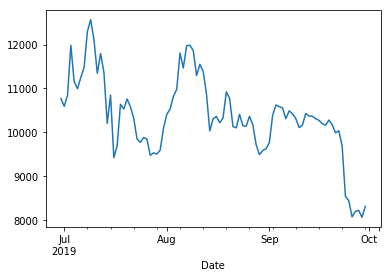

In [102]:
# Plot how the Open prices look

btc['Open'].plot()

Now, we compute the price movement during the 1 minute interval

In [103]:
btc['Delta'] = btc['Close'] - btc['Open']

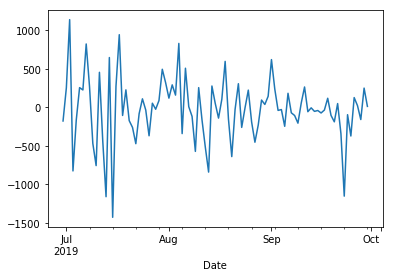

In [104]:
# And we plot the per-minute movements

btc['Delta'].plot(kind='line')

Let's take a look at some strong movements shown by the previous graphs (probably flash crashes). The *100* limit is arbitrary

In [105]:
btc[abs(btc['Delta']) >= 100]

,High,Low,Open,Close,Volume,Adj Close,Delta
Date,,,,,,,
2019-06-30,11207.000000,10006.429688,10769.049805,10591.870117,1225129699,10591.870117,-177.179688
2019-07-01,10927.599609,9678.099609,10591.870117,10844.129883,1239524970,10844.129883,252.259766
2019-07-02,12009.589844,10841.910156,10844.129883,11981.610352,1313585829,11981.610352,1137.480469
2019-07-03,12055.110352,11067.679688,11981.610352,11156.519531,831236841,11156.519531,-825.090820
2019-07-04,11435.379883,10787.940430,11156.519531,10993.250000,734424868,10993.250000,-163.269531
2019-07-05,11709.269531,10985.400391,10993.250000,11248.940430,549769169,11248.940430,255.690430
2019-07-06,11605.429688,11109.419922,11248.940430,11474.280273,418161890,11474.280273,225.339844
2019-07-07,12386.280273,11339.019531,11474.280273,12296.160156,762033323,12296.160156,821.879883
2019-07-08,12808.059570,12117.309570,12296.160156,12567.019531,993891866,12567.019531,270.859375


## Preparing the data for classification
We attach a label to each movement: 
* **1** if the price goes up
* **0** if the price goes down (or stays the same)

In [106]:
def digitize(n):
    if n > 0:
        return 1
    return 0
    
btc['to_predict'] = btc['Delta'].apply(lambda d: digitize(d))

In [107]:
# Show the last 5 elements of the btc dataframe

btc.tail()

,High,Low,Open,Close,Volume,Adj Close,Delta,to_predict
Date,,,,,,,,
2019-09-26,8304.219727,7888.500000,8074.990234,8201.360352,390323710,8201.360352,126.370117,1
2019-09-27,8345.030273,8044.450195,8201.360352,8223.650391,244186983,8223.650391,22.290039,1
2019-09-28,8265.990234,7943.330078,8223.650391,8065.259766,226712656,8065.259766,-158.390625,0
2019-09-29,8372.240234,7736.959961,8065.259766,8314.620117,407250929,8314.620117,249.360352,1
2019-09-30,8537.599609,8212.009766,8314.620117,8326.639648,355446344,8326.639648,12.019531,1


Now, we need the data as a `numpy` matrix

In [108]:
btc_mat = btc.as_matrix()

## Here's the idea:
We will train a classifier providing it with a window of previous `'Delta'` movements of length `WINDOW_SIZE`.
The outcome to predict is the next `'to_predict'` value

In [121]:
def rolling_window(a, window):
    """
        Takes np.array 'a' and size 'window' as parameters
        Outputs an np.array with all the ordered sequences of values of 'a' of size 'window'
        e.g. Input: ( np.array([1, 2, 3, 4, 5, 6]), 4 )
             Output: 
                     array([[1, 2, 3, 4],
                           [2, 3, 4, 5],
                           [3, 4, 5, 6]])
    """
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


WINDOW_SIZE = 14

In [124]:
# Generate the X dataset (the 'Delta' column is the 8th)
# Remove the last row since it can't have its Y value

X = rolling_window(btc_mat[:,7], WINDOW_SIZE)[:-1,:]

In [125]:
# Let's see how it looks

btc['Delta'].tail(10)

Date
2019-09-21      48.600586
2019-09-22    -342.380859
2019-09-23   -1152.059570
2019-09-24     -95.570312
2019-09-25    -371.979492
2019-09-26     126.370117
2019-09-27      22.290039
2019-09-28    -158.390625
2019-09-29     249.360352
2019-09-30      12.019531
Name: Delta, dtype: float64

In [126]:
# And now let's compare the above with the X matrix

print("{0}\n\nShape: {1}".format(X, X.shape))

[[0. 1. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]]

Shape: (79, 14)


In [127]:
# We generate the corresponding Y array and check if X and Y shapes are compatible

Y = btc['to_predict'].as_matrix()[WINDOW_SIZE:]
print("{0}\n\nShape: {1}".format(Y, Y.shape))

[1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 1]

Shape: (79,)


## It's time for some Random Forest

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

First, we create the *train* and *test* datasets, making the second **25%** of the whole data. Also, we need to make sure to balance the two datasets (`stratify=Y`)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4284, stratify=Y)

In [130]:
# Let's see how it looks

y_test[:100]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

Now, we fit a random forest classifier to the `X_train` and `y_train` data

In [131]:
clf = RandomForestClassifier(random_state=4284, n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=4284, verbose=0,
            warm_start=False)

We predict the values from the `X_test` data and we are ready the assess the model

In [132]:
predicted = clf.predict(X_test)

## Model Evaluation

In [133]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.22      0.31         9

   micro avg       0.55      0.55      0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20



In [134]:
conf_mat = confusion_matrix(y_test, predicted)

# Confusion matrix in percentages
pct_conf_mat = conf_mat/np.sum(conf_mat) * 100

print("Pred:  0\t\t1\n{}".format(pct_conf_mat))

Pred:  0		1
[[45. 10.]
 [35. 10.]]


## Conclusions

The classification report for this simple model is encouraging, even though it's far from perfect.

### Some suggestions
* Run multiple models for different batches of time - this is because the dynamics of any financial market can change dramatically over time and the range considered in this analysys is more than 5 years.
* Use other classification models (NN, SVMs, maybe even k-NN).
* Cross-validate! Tweak the hyperparameters of the Random Forest classifier and the `WINDOW_SIZE`.

*Feel free to fork and implement your ideas. Enjoy!*